In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DIR = '/content/drive/MyDrive/Colab Notebooks'
FILENAME = 'data/GOOG.csv'
df_google = pd.read_csv(DIR+"/"+FILENAME)
df_google.head()

,date,open,high,low,close,volume
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000


In [ ]:
df_google = pd.read_csv(DIR+"/"+FILENAME)
df_google.head()

,date,open,high,low,close,volume
0,2014-03-27,28.4000,28.4000,27.6460,27.9230,262000
1,2014-03-28,28.0600,28.3215,27.9335,27.9995,822000
2,2014-03-31,28.3445,28.3500,27.8465,27.8485,216000
3,2014-04-01,27.9355,28.4225,27.9355,28.3580,158000
4,2014-04-02,28.2553,30.2415,28.1095,28.3500,2934000


In [ ]:
df_google.info() # check the data types in google csv dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2360 non-null   object 
 1   open    2360 non-null   float64
 2   high    2360 non-null   float64
 3   low     2360 non-null   float64
 4   close   2360 non-null   float64
 5   volume  2360 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 110.8+ KB


In [ ]:
df_google.dtypes # short - check the data types in google csv dataframe

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [ ]:
df_google['date'] = pd.to_datetime(df_google['date'], format='%Y-%m-%d')
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2360 non-null   datetime64[ns]
 1   open    2360 non-null   float64       
 2   high    2360 non-null   float64       
 3   low     2360 non-null   float64       
 4   close   2360 non-null   float64       
 5   volume  2360 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 110.8 KB


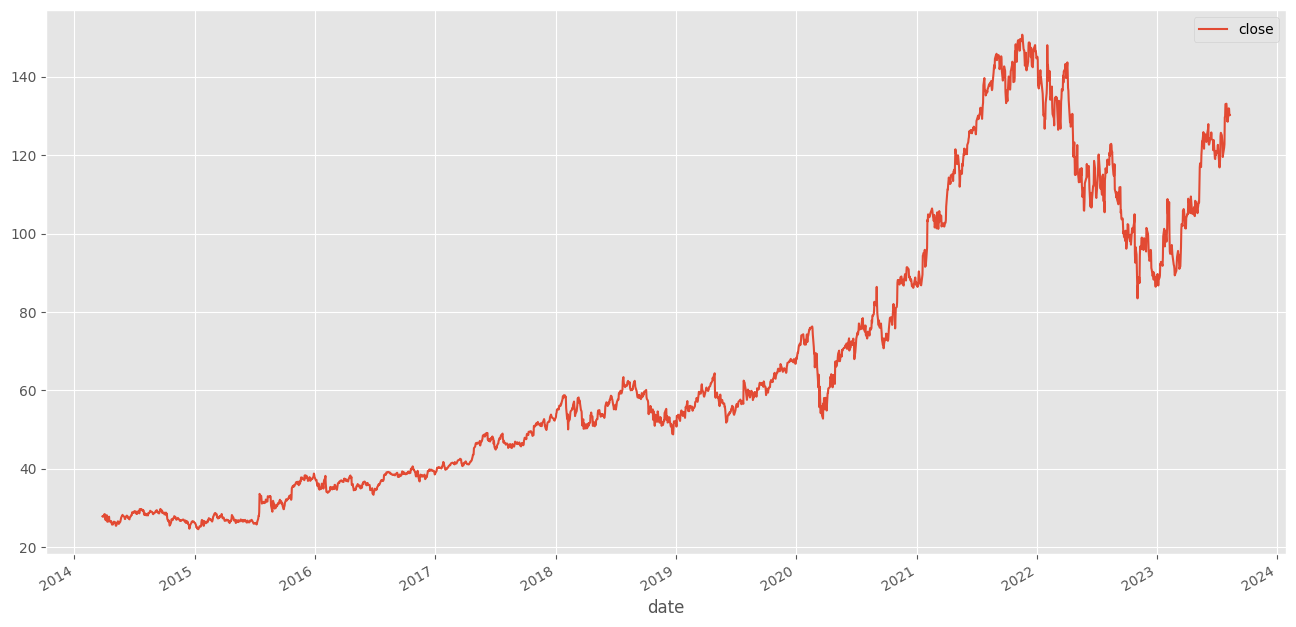

In [ ]:
style.use("ggplot")
df_google.plot(x="date", y="close", figsize=(16,8))
plt.show()

In [ ]:
def calculate_moving_average(data, window_size):
    moving_avg = []
    for i in range(len(data)):
        start_idx = max(0, i - window_size + 1)
        end_idx = i + 1
        window = data[start_idx:end_idx]
        avg = np.mean(window)
        moving_avg.append(avg)
    return moving_avg

window_size = 400
close_prices = df_google["close"].values
moving_avg = calculate_moving_average(close_prices, window_size)

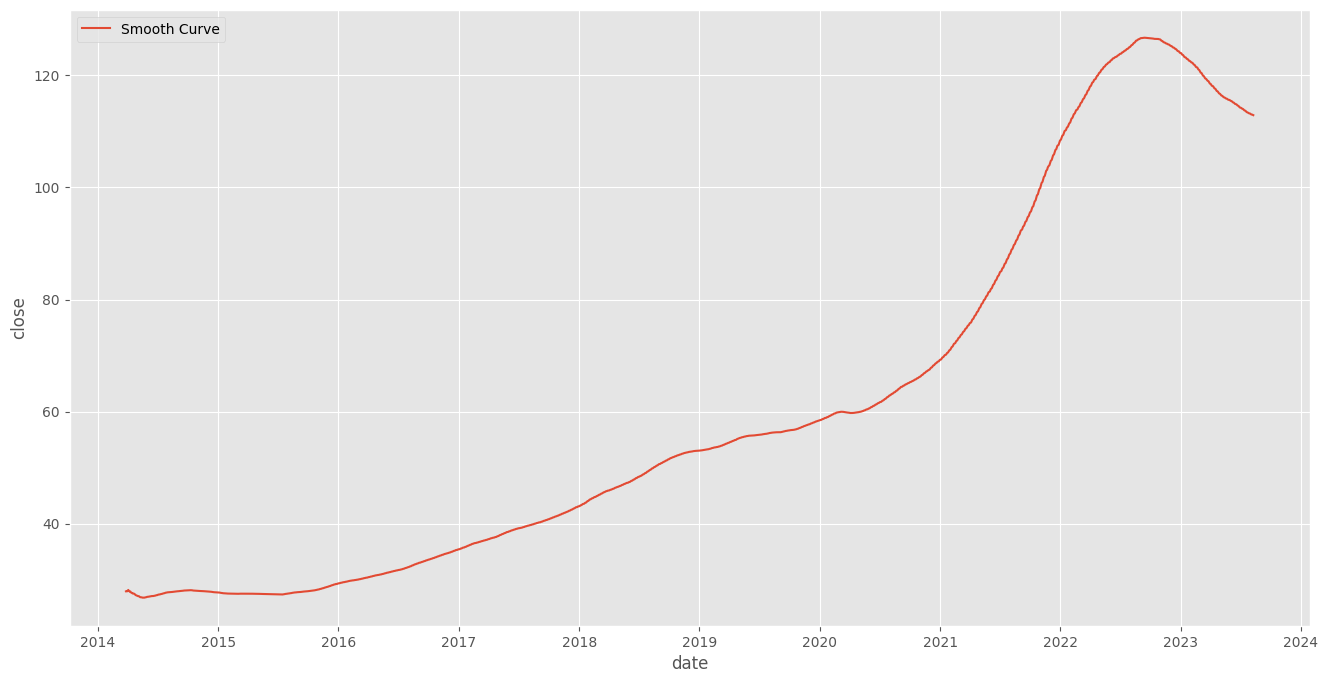

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_google["date"], moving_avg, label = "Smooth Curve")
plt.xlabel("date")
plt.ylabel("close")
plt.legend()
plt.show()

In [ ]:
close_new = df_google["close"].values
window_size = 100
window = np.ones(window_size)/window_size
moving_avg = df_google["close"].rolling(window=window_size, min_periods=1).mean()

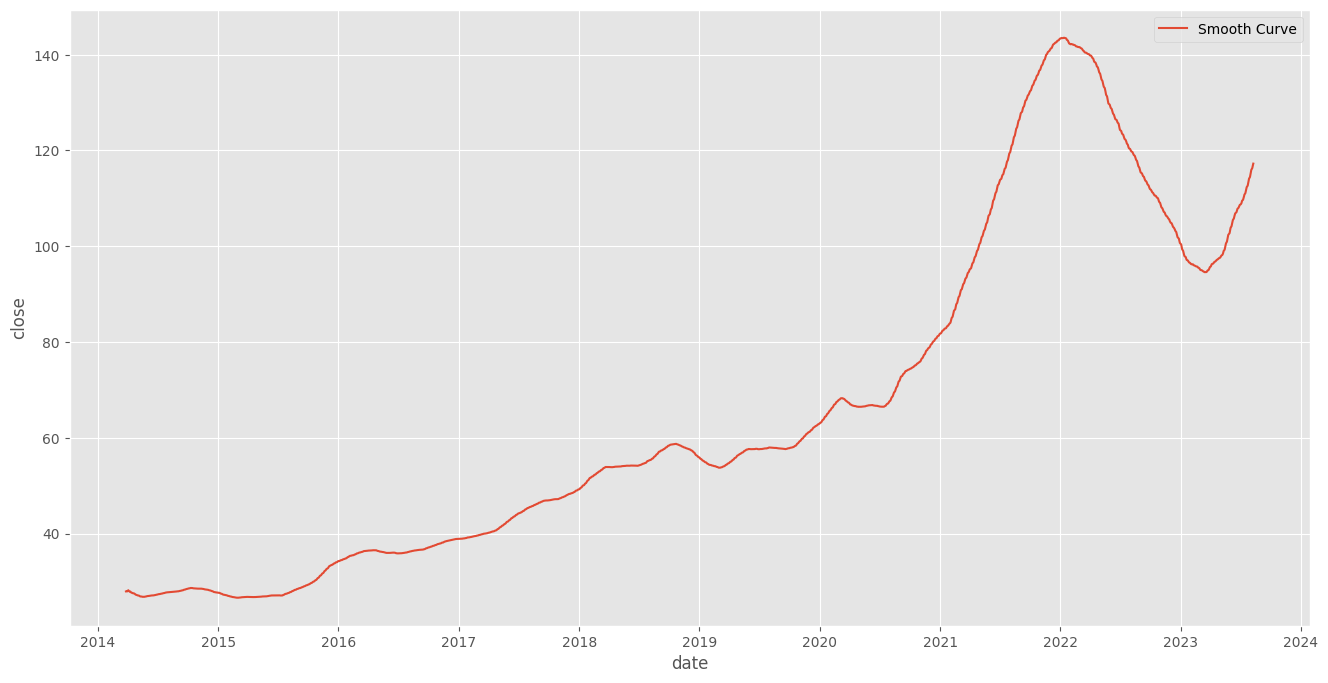

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df_google["date"], moving_avg, label = "Smooth Curve")
plt.xlabel("date")
plt.ylabel("close")
plt.legend()
plt.show()